In [3]:
import matplotlib.pyplot as plt

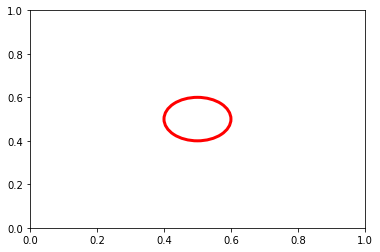

In [20]:
fig, ax = plt.subplots()
p = plt.Circle((0.5,0.5), 0.1, facecolor="none", edgecolor="red", linewidth=3)
ax.add_artist(p)

In [11]:
type(p).__mro__

(matplotlib.patches.Circle,
 matplotlib.patches.Ellipse,
 matplotlib.patches.Patch,
 matplotlib.artist.Artist,
 object)

In [40]:
%config InlineBackend.print_figure_kwargs={"bbox_inches": None}

[112.58181818 101.232     ]
72.0
1.5636363636363635 1.406


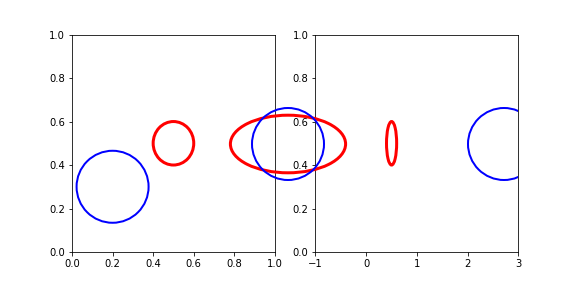

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax2.set_xlim(-1, 3)

def rel_circle(area, x, y):
    p = plt.Circle((x,y), 0.1,
                   facecolor="none", edgecolor="red", linewidth=3)
    area.add_artist(p)
    
def abs_circle(area, x, y):
    p = plt.Circle((x,y), 0.5,
                   facecolor="none", edgecolor="blue", linewidth=2,
                   transform=fig.dpi_scale_trans)
    area.add_artist(p)

# drawing an axes subplots
rel_circle(ax1, 0.5, 0.5)
rel_circle(ax2, 0.5, 0.5)

# draw on the figure
# coord system for fig: 0,0 is bottom left, 1,1 is top right
rel_circle(fig, 0.5, 0.5)

# draw centered circle on the figure (in absolute terms)
abs_circle(fig, 4, 2)
abs_circle(ax2, 7, 2)

# what if we want a truly round circle at point 0.2,0.3 on the left ax object?
print(ax1.transData.transform((0.2,0.3))) # this is in absolute dot/pixels
print(fig.dpi) # how many dots/pixels per inch?
x, y = ax1.transData.transform((0.2,0.3)) / fig.dpi
print(x, y) # absolute inches of that data point
abs_circle(ax1, x, y)

In [61]:
# for later...
import pandas as pd
df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180


<AxesSubplot:xlabel='x', ylabel='y'>

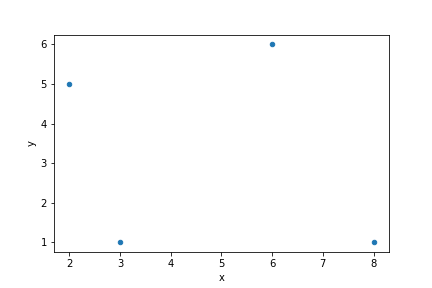

In [62]:
df.plot.scatter(x="x", y="y")

In [80]:
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180


2 5
3 1
6 6
8 1


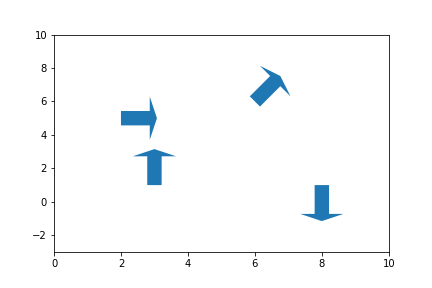

In [84]:
import math

fig, ax = plt.subplots()
ax.set_xlim(0,10)
ax.set_ylim(-3,10)

for t in df.itertuples():
    print(t.x, t.y)
    angle = math.radians(t.a)
    x, y = ax.transData.transform((t.x, t.y)) / fig.dpi
    arrow = plt.Arrow(x, y,
                      math.sin(angle)*0.5, math.cos(angle)*0.5,
                      transform=fig.dpi_scale_trans)
    ax.add_artist(arrow)

# Example 2: plot with some annotations

<AxesSubplot:>

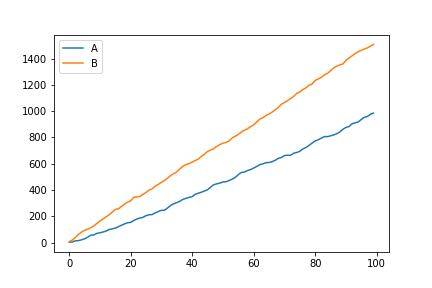

In [97]:
import numpy as np
df = pd.DataFrame({
    "A": np.random.normal(10, 5, 100),
    "B": np.random.normal(15, 5, 100)
}).cumsum()
df.plot.line()

Text(50, 1000, 'hi')

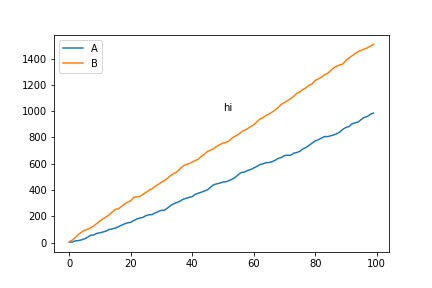

In [98]:
ax = df.plot.line()
ax.text(50, 1000, "hi")